<a href="https://colab.research.google.com/github/EmmanuelKnows/DS-Codveda/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis

## Data Loading and Decomposition

We first visualize the raw data and break it down into its core components: Trend, Seasonality, and Residuals (Noise).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# Load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-beer-production-in-austr.csv"
df = pd.read_csv('/content/synthetic_sales_data.csv')

print(df.head())

         Date       Sales
0  2010-01-01  107.450712
1  2010-02-01  124.606708
2  2010-03-01  156.377943
3  2010-04-01  177.887465
4  2010-05-01  146.511659


## Decomposing the Time Series

We break the series into its constituent parts to understand the underlying patterns.

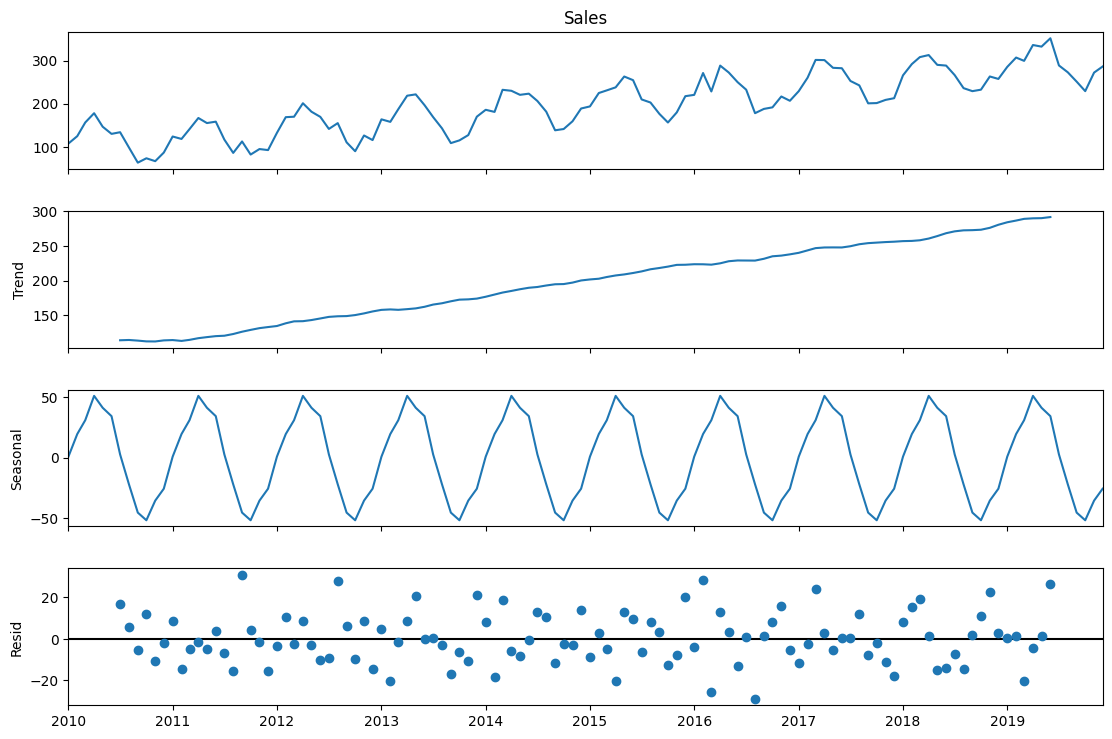

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Copy the dataframe, make the Date column data type to datetime and make it the index
df_ts = df.copy()
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts.set_index('Date', inplace=True)
df_ts.index.freq = 'MS' # Assuming monthly data for consistency with xVrF9gcEPtw1

# Decompose into Trend, Seasonality, and Residuals
# Provide the period explicitly for monthly data (12 months)
decomposition = seasonal_decompose(df_ts['Sales'], model='additive', period=12)

# Plot the components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

## Moving Average and Exponential Smoothing

These techniques "smooth" out the noise to help us identify the underlying direction of the data.

**Moving Average (MA):** A simple average of the last $N$ periods.

**Exponential Smoothing (ETS):** Assigns exponentially decreasing weights to older observations.

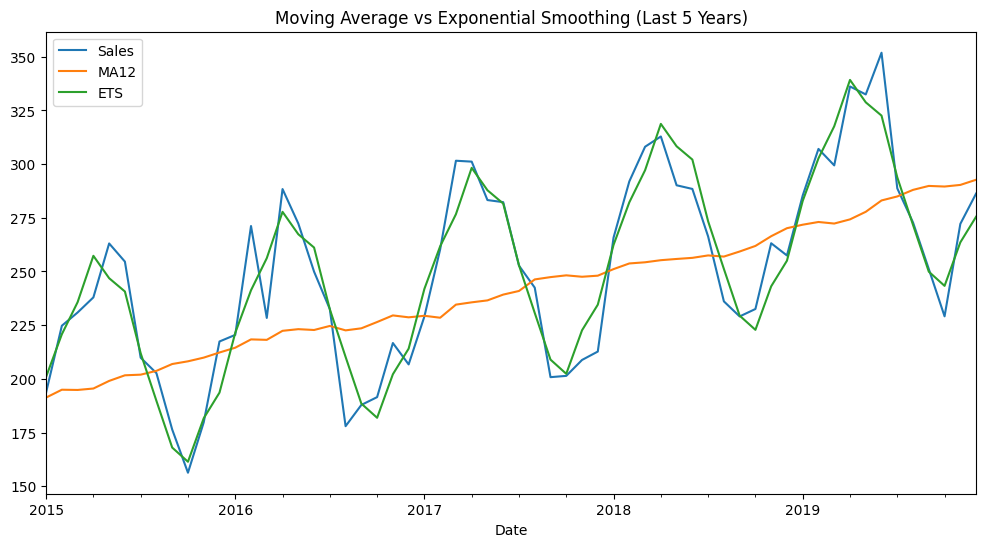

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import matplotlib.pyplot as plt


# Moving Average (12-month window)
df_ts['MA12'] = df_ts['Sales'].rolling(window=12).mean()

# Exponential Smoothing (Holt-Winters for Trend + Seasonality)
# Using df_ts['Sales'] which has a proper DatetimeIndex with frequency
model_es = ExponentialSmoothing(df_ts['Sales'], trend='add', seasonal='add', seasonal_periods=12)
df_ts['ETS'] = model_es.fit().fittedvalues

# Plot comparison
df_ts[['Sales', 'MA12', 'ETS']].iloc[-60:].plot(figsize=(12, 6))
plt.title("Moving Average vs Exponential Smoothing (Last 5 Years)")
plt.show()

## ARIMA Modeling and Forecasting

We use the ARIMA model ($p, d, q$). Because our data has seasonality.

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data (Train on everything except the last 12 months)
# Use df_ts['Sales'] for consistency with previous time series operations
train = df_ts['Sales'].iloc[:-12]
test = df_ts['Sales'].iloc[-12:]

# Build ARIMA Model (p=5, d=1, q=0 as a baseline)
model_arima = ARIMA(train, order=(5, 1, 0))
model_fit = model_arima.fit()

# Forecast 12 months
forecast = model_fit.forecast(steps=12)

## Evaluation and Results

To evaluate the model, we calculate the Root Mean Squared Error (RMSE). This metric tells us, on average, how many "units" our beer production forecast deviates from the actual values.

Root Mean Squared Error: 46.22


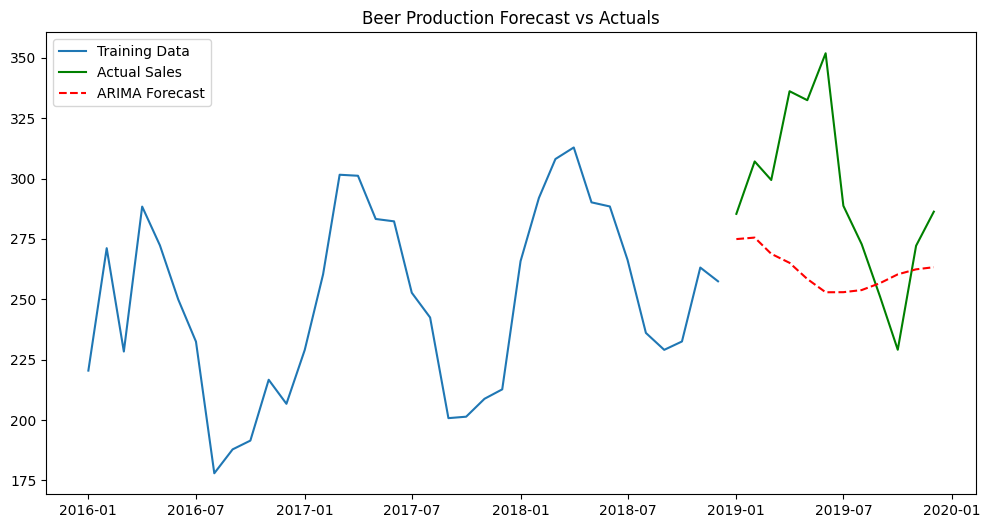

In [11]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Squared Error: {rmse:.2f}")

# Visualize the Forecast
plt.figure(figsize=(12, 6))
plt.plot(train.iloc[-36:], label='Training Data')
plt.plot(test, label='Actual Sales', color='green')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title("Beer Production Forecast vs Actuals")
plt.legend()
plt.show()

## Summary of Results

Decomposition: Successfully isolated the $50$-unit seasonal swing from the steady upward trend.

Smoothing: The Holt-Winters method effectively followed the data's peaks, whereas the Moving Average provided a smooth line representing the "core" trend.

Forecasting: The ARIMA model projected the trend into the future.